In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D , Activation, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adamax,Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import  EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

print('models loaded')

models loaded


In [3]:
data_dir='E:\Abdulrahman/cellula_computer_vision_intership/first_session_code/Week1/Teeth_Dataset'
target_folder='Training'
filepath=[]
labels=[]
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        fipath=os.listdir(fpath)
        for image in fipath:
            path = os.path.join(fpath, image)
            filepath.append(path)
            labels.append(f)

f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
train_df = pd.concat([f_series, l_series], axis=1)
train_df


filepath labels
0     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
1     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
2     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
3     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
4     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
...                                                 ...    ...
3082  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
3083  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
3084  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
3085  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
3086  E:\Abdulrahman/cellula_computer_vision_intersh...     OT

[3087 rows x 2 columns]

In [4]:
data_dir='E:\Abdulrahman/cellula_computer_vision_intership/first_session_code/Week1/Teeth_Dataset'
target_folder='Testing'
filepath=[]
labels=[]
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        fipath=os.listdir(fpath)
        for image in fipath:
            path = os.path.join(fpath, image)
            filepath.append(path)
            labels.append(f)

f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
test_df = pd.concat([f_series, l_series], axis=1)
test_df

filepath labels
0     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
1     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
2     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
3     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
4     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
...                                                 ...    ...
1023  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
1024  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
1025  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
1026  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
1027  E:\Abdulrahman/cellula_computer_vision_intersh...     OT

[1028 rows x 2 columns]

In [5]:
data_dir='E:\Abdulrahman/cellula_computer_vision_intership/first_session_code/Week1/Teeth_Dataset'
target_folder='Validation'
filepath=[]
labels=[]
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        fipath=os.listdir(fpath)
        for image in fipath:
            path = os.path.join(fpath, image)
            filepath.append(path)
            labels.append(f)

f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
valid_df = pd.concat([f_series, l_series], axis=1)
valid_df

filepath labels
0     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
1     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
2     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
3     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
4     E:\Abdulrahman/cellula_computer_vision_intersh...    CaS
...                                                 ...    ...
1023  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
1024  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
1025  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
1026  E:\Abdulrahman/cellula_computer_vision_intersh...     OT
1027  E:\Abdulrahman/cellula_computer_vision_intersh...     OT

[1028 rows x 2 columns]

In [6]:
train_counts = train_df['labels'].value_counts().reset_index()
train_counts.columns = ['labels', 'count']

In [7]:
train_counts

labels  count
0     MC    540
1    OLP    540
2    CaS    480
3    CoS    450
4     OT    393
5    Gum    360
6     OC    324

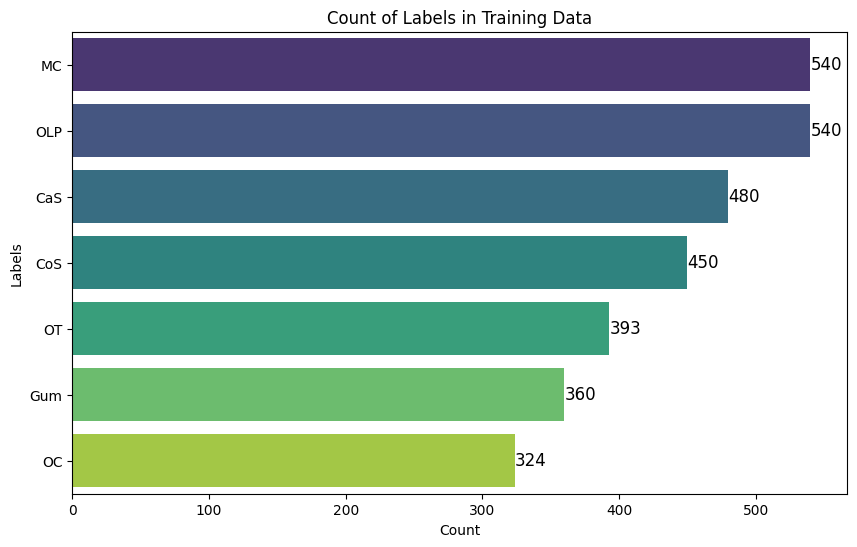

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=train_counts, x='count', y='labels', palette='viridis')
for index, row in train_counts.iterrows():
    ax.text(row['count'], index, str(row['count']), va='center', fontsize=12)
plt.title('Count of Labels in Training Data')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

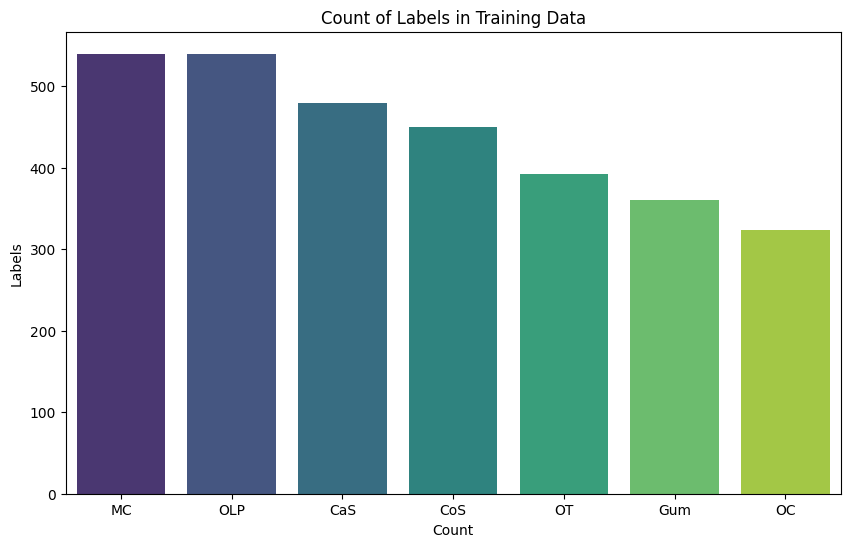

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=train_df['labels'].value_counts().index,y=train_df['labels'].value_counts(),palette='viridis')
plt.title('Count of Labels in Training Data')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()


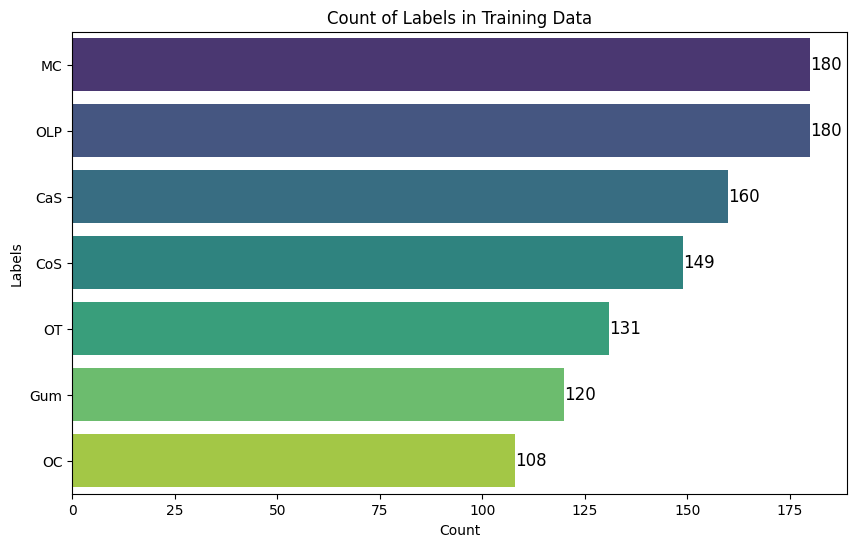

In [10]:
valid_counts = valid_df['labels'].value_counts().reset_index()
valid_counts.columns = ['labels', 'count']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=valid_counts, x='count', y='labels',palette='viridis')
for index, row in valid_counts.iterrows():
    ax.text(row['count'], index, str(row['count']), va='center', fontsize=12)
plt.title('Count of Labels in Training Data')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

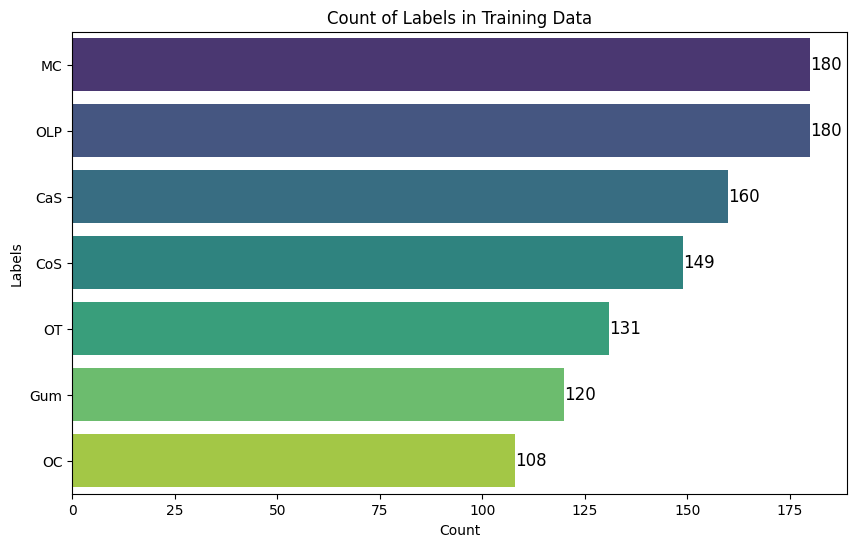

In [11]:
test_counts = test_df['labels'].value_counts().reset_index()
test_counts.columns = ['labels', 'count']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=test_counts, x='count', y='labels',palette='viridis')
for index, row in test_counts.iterrows():
    ax.text(row['count'], index, str(row['count']), va='center', fontsize=12)
plt.title('Count of Labels in Training Data')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

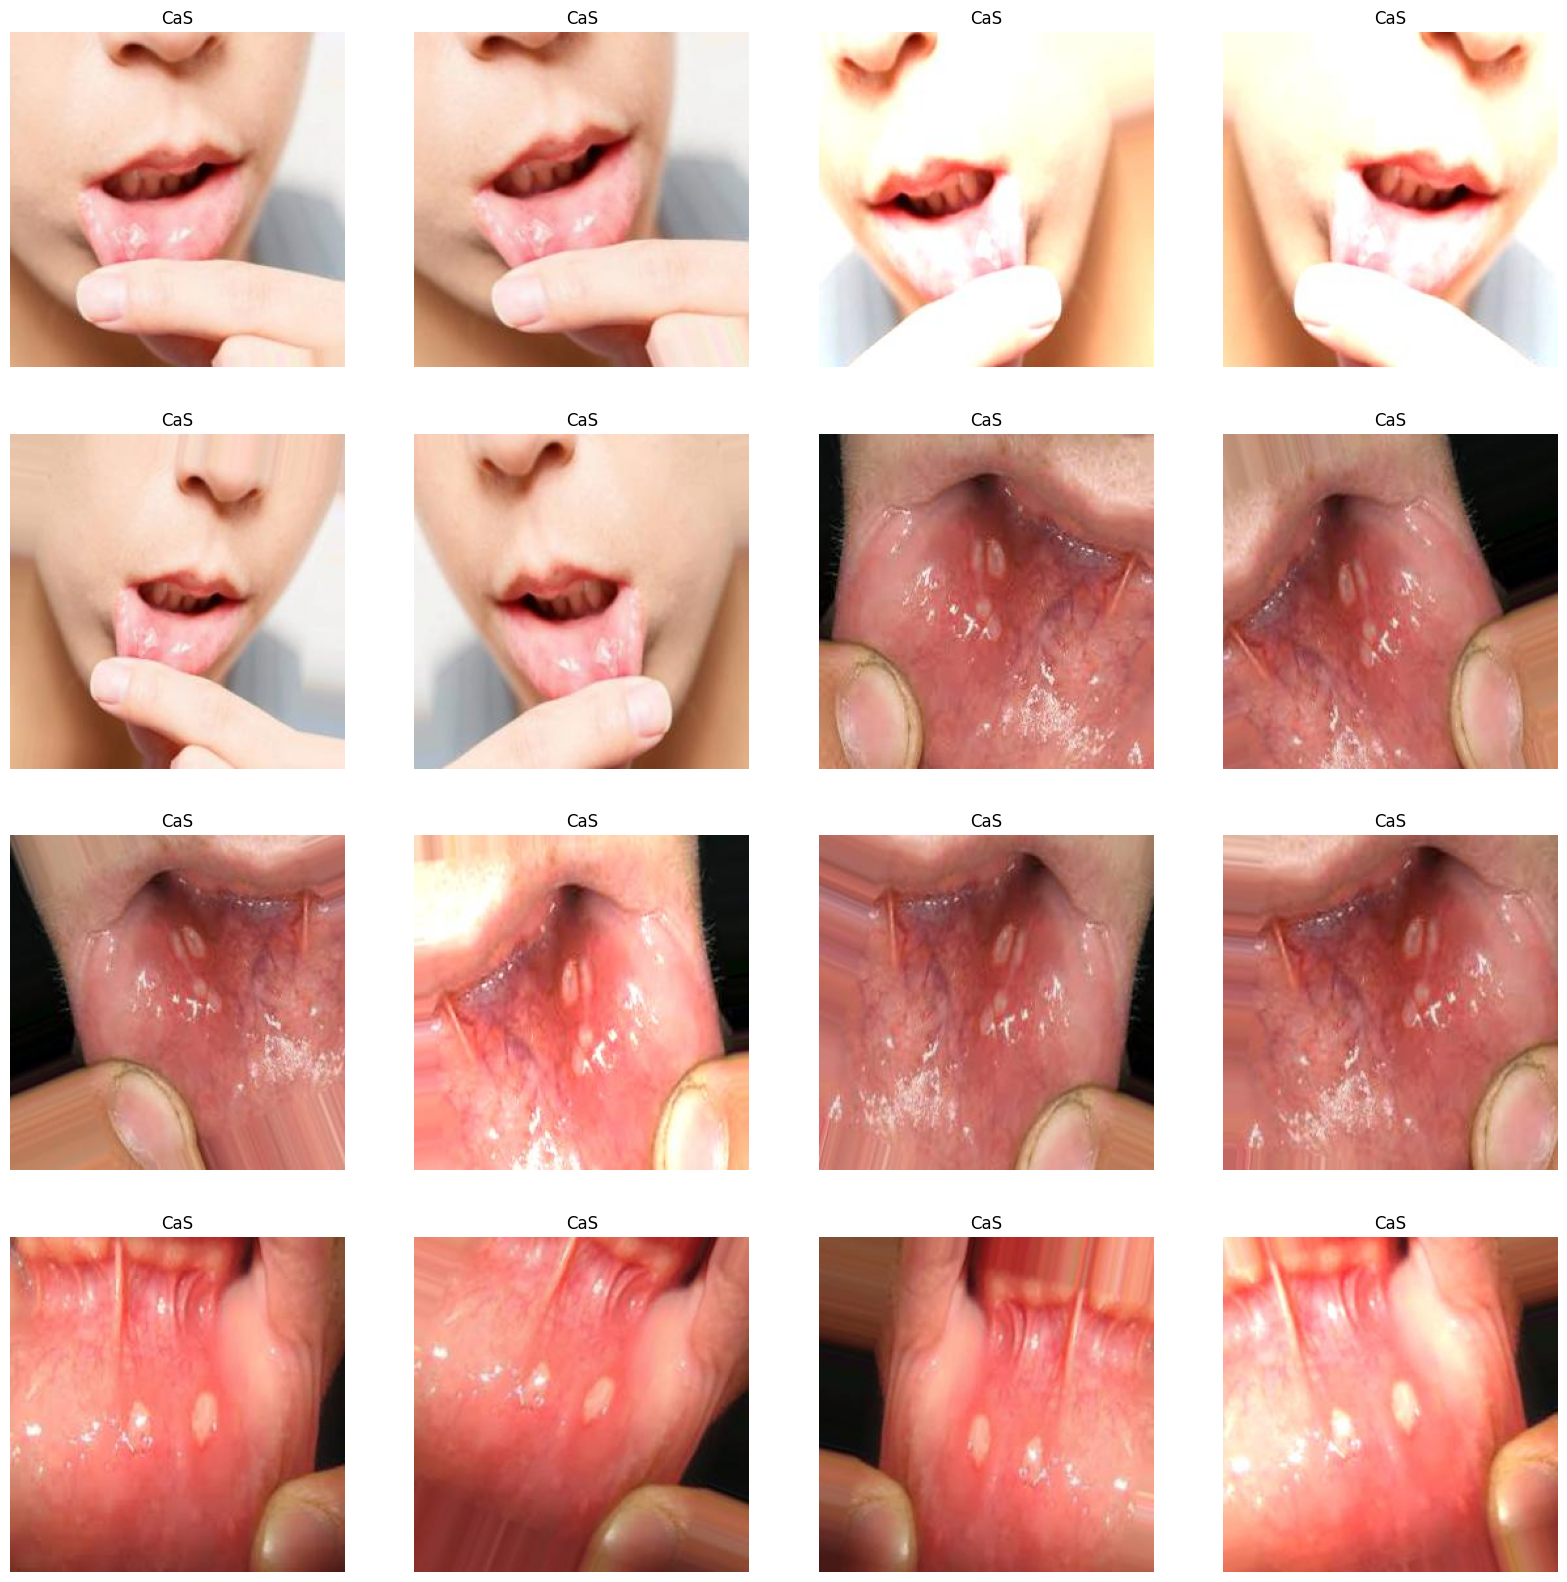

In [12]:
classes = train_df['labels'].unique()

g_dict = {class_name: index for index, class_name in enumerate(classes)}
plt.figure(figsize=(20, 20))
for i in range(min(16, len(train_df))):
    plt.subplot(4, 4, i + 1)
    img_path = train_df.iloc[i]['filepath']
    image = Image.open(img_path)
    image = np.array(image) / 255  
    plt.imshow(image)
    class_name = train_df.iloc[i]['labels']
    plt.title(class_name, color='black', fontsize=12)
    plt.axis('off')
plt.show()

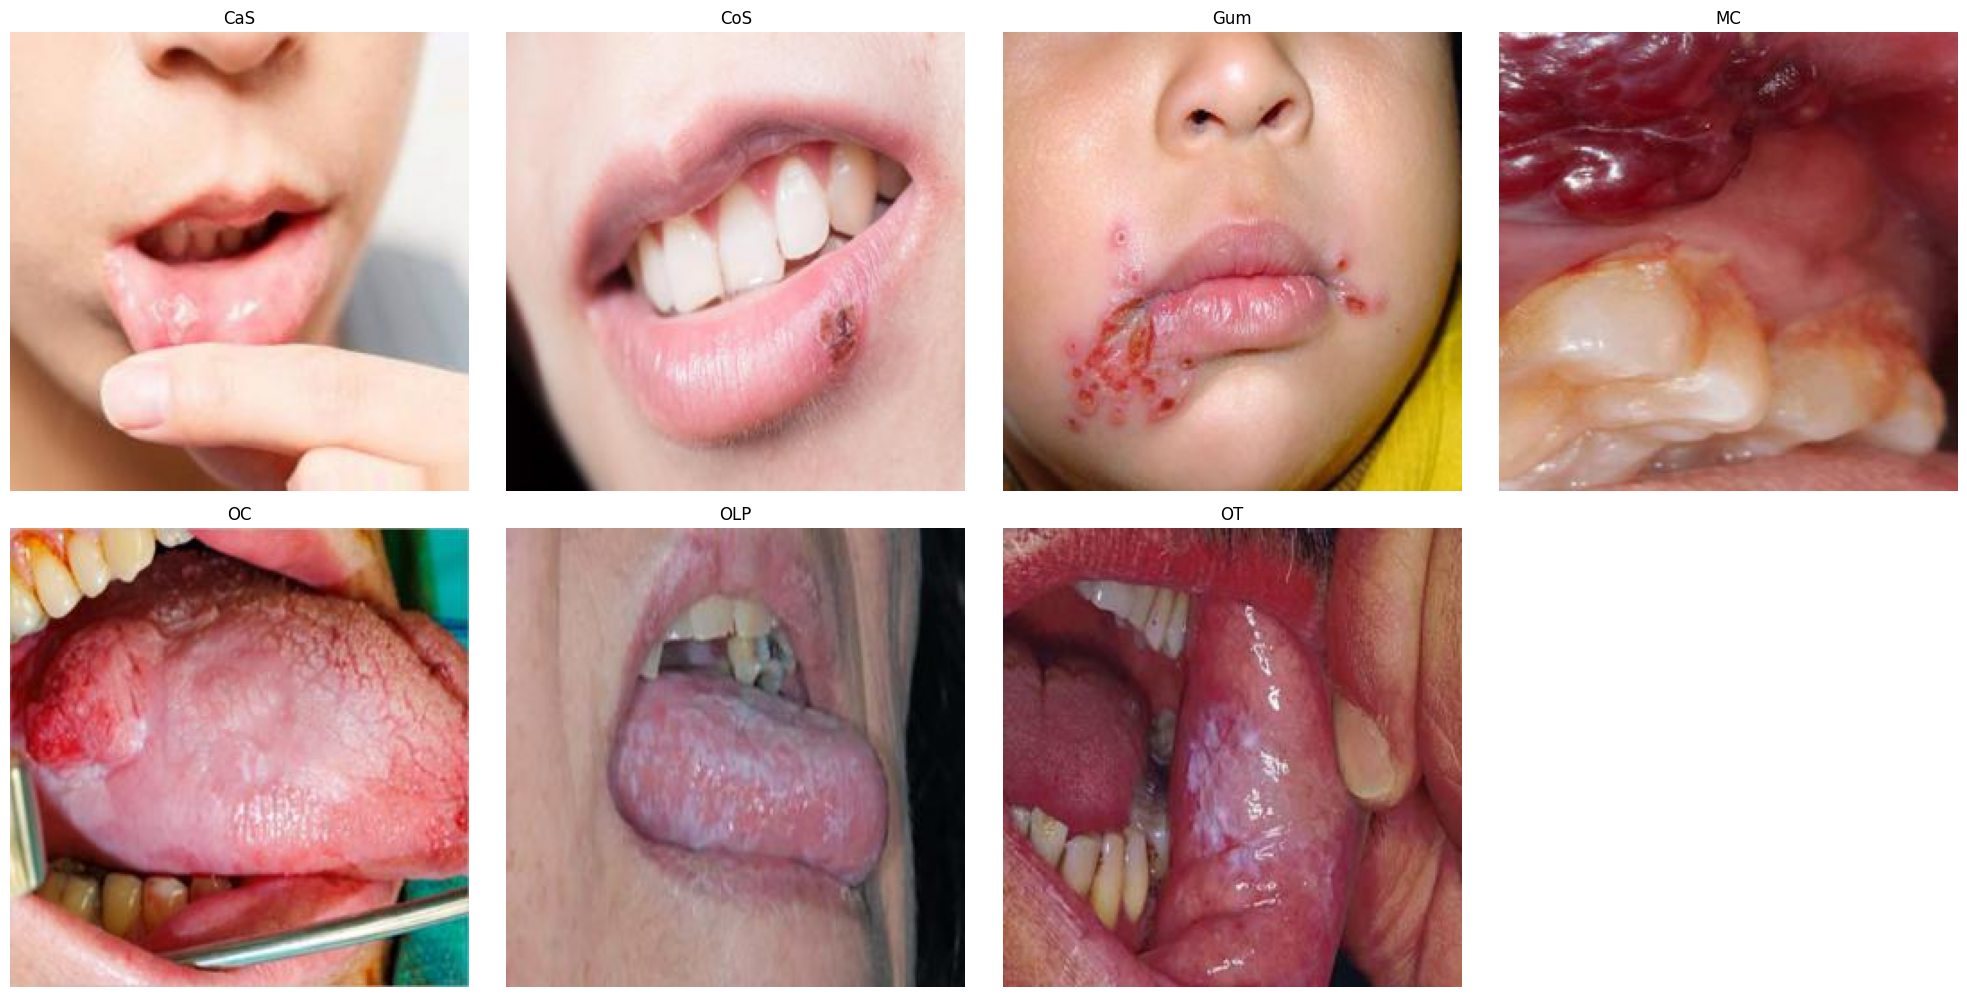

In [13]:
# Get unique classes
classes = train_df['labels'].unique()

# Create class-to-index dictionary
g_dict = {class_name: index for index, class_name in enumerate(classes)}

# Create a sample of one image per class
sample_df = train_df.groupby('labels').first().reset_index()

# Limit to 16 classes max (if desired)
sample_df = sample_df.head(16)

# Plot sample images
plt.figure(figsize=(20, 20))
for i, (_, row) in enumerate(sample_df.iterrows()):
    plt.subplot(4, 4, i + 1)
    img_path = row['filepath']
    image = Image.open(img_path)
    image = np.array(image) / 255.0
    plt.imshow(image)
    plt.title(row['labels'], color='black', fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [14]:
print(train_df.shape)
print(valid_df.shape)
print(test_df.shape)

(3087, 2)
(1028, 2)
(1028, 2)


In [15]:
batch_size = 32
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
gen = ImageDataGenerator()
ts_gen=ImageDataGenerator()

train_gen = gen.flow_from_dataframe( train_df, x_col= 'filepath', y_col= 'labels', target_size= img_size,
                                    class_mode= 'categorical',color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = gen.flow_from_dataframe( valid_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, 
                                    class_mode= 'categorical',color_mode= 'rgb', shuffle= True, batch_size= batch_size)
test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, 
                                    class_mode= 'categorical',color_mode= 'rgb', shuffle= True, batch_size= batch_size)

Found 3087 validated image filenames belonging to 7 classes.
Found 1028 validated image filenames belonging to 7 classes.
Found 1028 validated image filenames belonging to 7 classes.


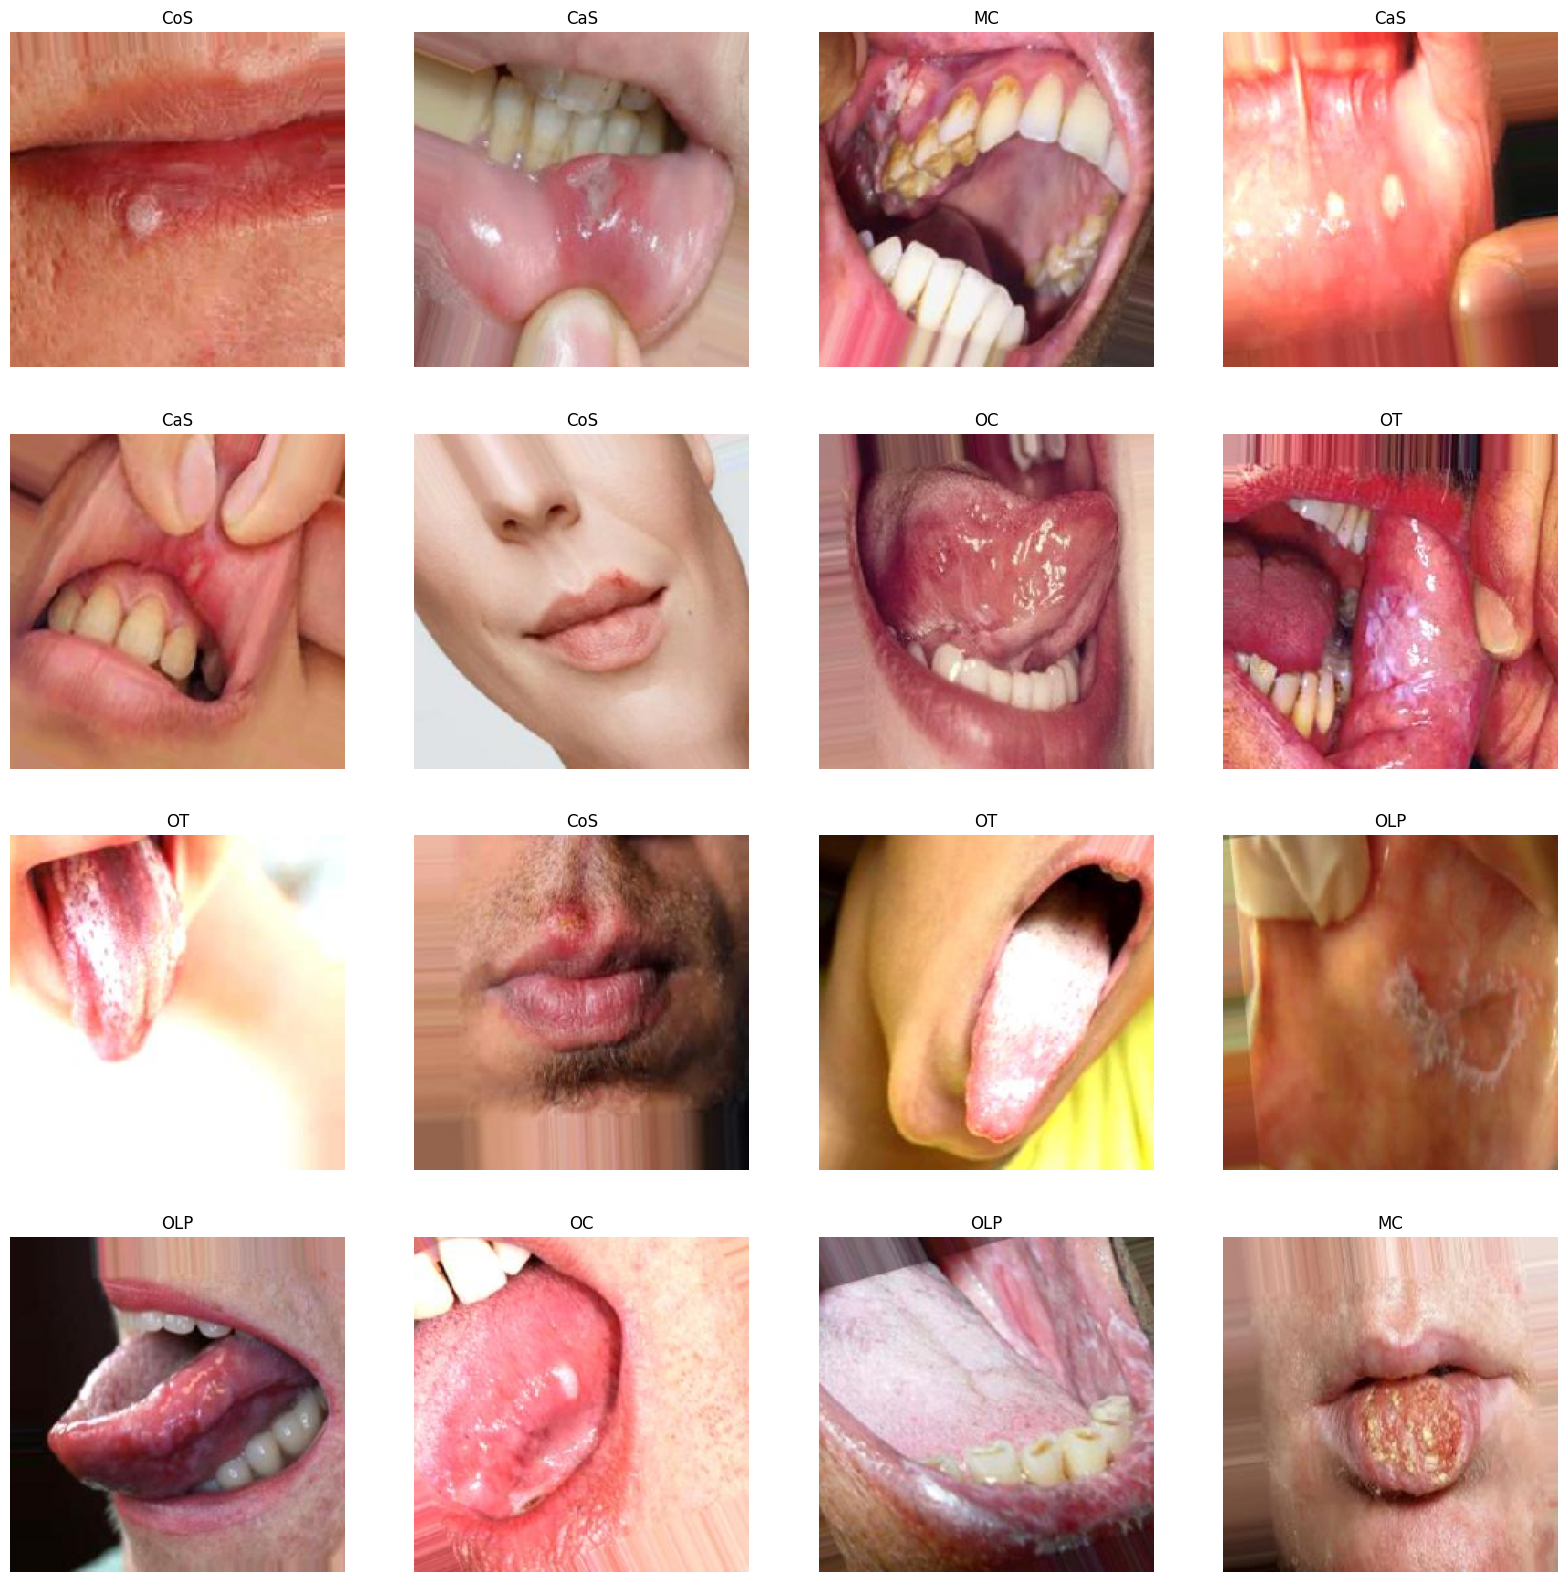

In [16]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color= 'black', fontsize= 12)
    plt.axis('off')
plt.show()

In [35]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=img_shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 26, 26, 64)      

In [36]:
history=model.fit(train_gen,validation_data=valid_gen,epochs=100)

Epoch 1/100
386/386 [==============================] - 8s 18ms/step - loss: 2.5562 - accuracy: 0.2371 - val_loss: 1.8530 - val_accuracy: 0.2626
Epoch 2/100
386/386 [==============================] - 7s 17ms/step - loss: 1.7107 - accuracy: 0.3152 - val_loss: 1.6251 - val_accuracy: 0.3784
Epoch 3/100
386/386 [==============================] - 7s 17ms/step - loss: 1.6464 - accuracy: 0.3622 - val_loss: 1.7173 - val_accuracy: 0.3288
Epoch 4/100
386/386 [==============================] - 6s 17ms/step - loss: 1.5992 - accuracy: 0.3826 - val_loss: 1.6823 - val_accuracy: 0.3161
Epoch 5/100
386/386 [==============================] - 6s 17ms/step - loss: 1.5376 - accuracy: 0.4059 - val_loss: 1.5449 - val_accuracy: 0.3842
Epoch 6/100
386/386 [==============================] - 7s 17ms/step - loss: 1.4475 - accuracy: 0.4393 - val_loss: 1.3501 - val_accuracy: 0.4951
Epoch 7/100
386/386 [==============================] - 6s 17ms/step - loss: 1.3955 - accuracy: 0.4687 - val_loss: 1.3434 - val_accuracy:

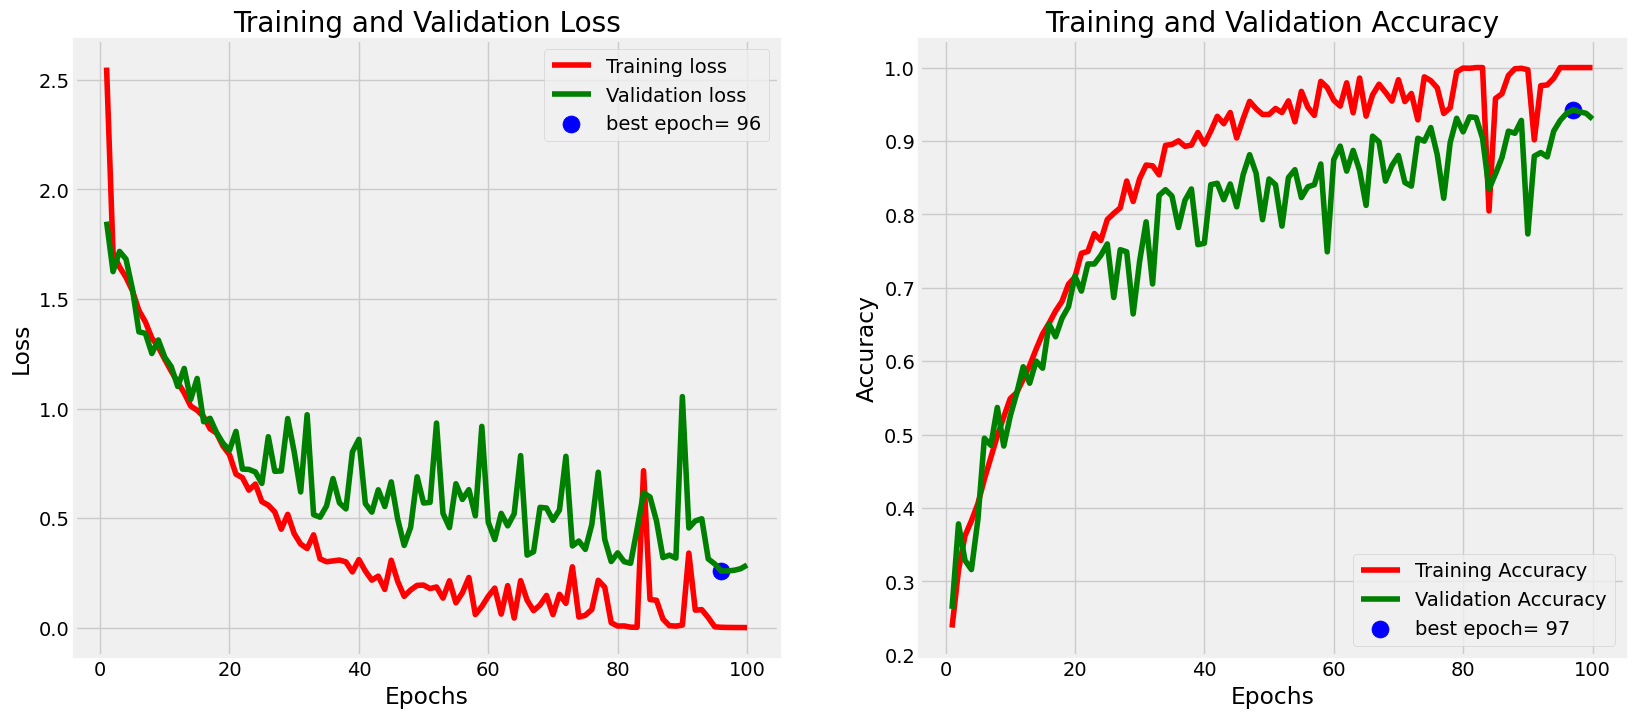

In [40]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [37]:
train_score = model.evaluate(train_gen,verbose= 1)
valid_score = model.evaluate(valid_gen,verbose= 1)
test_score = model.evaluate(test_gen,verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

33/33 [==============================] - 2s 39ms/step - loss: 0.3062 - accuracy: 0.9475
Train Loss:  0.0003885792975779623
Train Accuracy:  1.0
--------------------
Valid Loss:  0.2857460379600525
Valid Accuracy:  0.929961085319519
--------------------
Test Loss:  0.3061840832233429
Test Accuracy:  0.9474708437919617


1/1 [==============================] - 0s 66ms/step


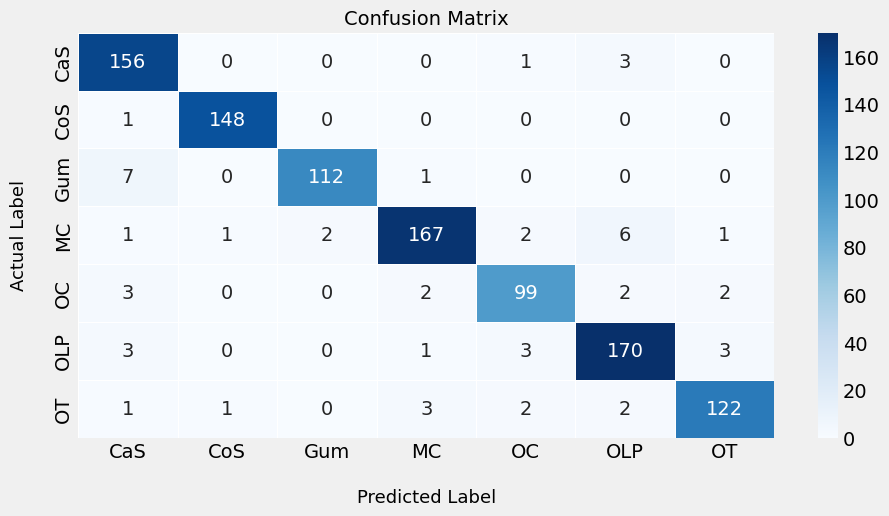

In [42]:
labels = list(test_gen.class_indices.keys())  
num_classes = len(labels)

actual_labels = []
predicted_labels = []

for i in range(len(test_gen)):
    images, batch_labels = test_gen[i]  
    batch_preds = model.predict(images)  
    batch_preds = np.argmax(batch_preds, axis=1) 

    batch_labels = np.argmax(batch_labels, axis=1)  

    actual_labels.extend(batch_labels)
    predicted_labels.extend(batch_preds)

actual_labels = np.array(actual_labels, dtype=int)
predicted_labels = np.array(predicted_labels, dtype=int)

cm = confusion_matrix(actual_labels, predicted_labels)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, linewidths=0.5)
plt.xlabel('\nPredicted Label', fontsize=13)
plt.ylabel('Actual Label\n', fontsize=13)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

In [43]:
report = classification_report(actual_labels, predicted_labels, target_names=labels)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

         CaS       0.91      0.97      0.94       160
         CoS       0.99      0.99      0.99       149
         Gum       0.98      0.93      0.96       120
          MC       0.96      0.93      0.94       180
          OC       0.93      0.92      0.92       108
         OLP       0.93      0.94      0.94       180
          OT       0.95      0.93      0.94       131

    accuracy                           0.95      1028
   macro avg       0.95      0.95      0.95      1028
weighted avg       0.95      0.95      0.95      1028

